In [1]:
# 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

data142040


In [2]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [3]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: 无法创建目录"/home/aistudio/external-libraries": 文件已存在
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/9c/d8/909c4089dbe4ade9f9705f143c9f13f065049a9d5e7d34c828aefdd0a97c/beautifulsoup4-4.11.1-py3-none-any.whl (128 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/16/e3/4ad79882b92617e3a4a0df1960d6bce08edfb637737ac5c3f3ba29022e25/soupsieve-2.3.2.post1-py3-none-any.whl (37 kB)
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


In [4]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [5]:
! unzip -d data/data142040 data/data142040/苹果图像.zip
! mv data/data142040/╞╗╣√═╝╧ё data/data142040/apples #重命名解压后的文件夹

Archive:  data/data142040/苹果图像.zip
  inflating: data/data142040/╞╗╣√═╝╧ё/1.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/10.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/2.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/3.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/4.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/5.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/6.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/7.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/8.jpg  
  inflating: data/data142040/╞╗╣√═╝╧ё/9.jpg  


In [6]:
# ! pip install opencv-contrib-python
# !pip uninstall opencv-python-headless
# !pip install opencv-python-headless==4.1.2.30
# !pip install skimage 这句会失败
!pip install scikit-image -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the '/opt/conda/envs/python35-paddle120-env/bin/python -m pip install --upgrade pip' command.


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage

原始图像：


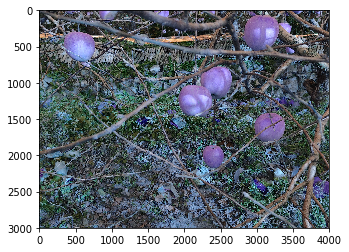

灰度图像：


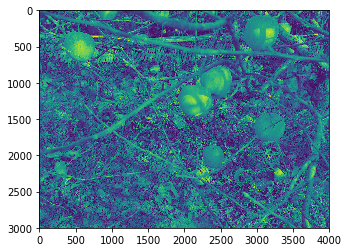

Text(0.5,1,'gray')

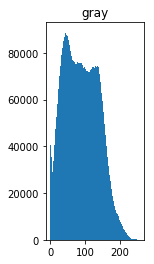

In [8]:
# 原始图像灰度化
img_path =r"data/data142040/apples/5.jpg"
original_img = cv2.imread(img_path)
print("原始图像：")
plt.imshow(original_img)
plt.show()

print("灰度图像：")
gray_image = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY) #灰度图
plt.imshow(gray_image)
plt.show()
cv2.imwrite("data/data142040/Gray.png", gray_image)

# 灰度直方图
plt.subplot(1, 3, 1) 
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.title("gray")
# plt.hist(gray_image.ravel(), 256, [0, 256],color='c')
# plt.title("gray")
# plt.show()

In [9]:
# 分离RGB三个通道 并展示灰度图和灰度直方图
def split_rgb(img):
    (blue, green, red) = cv2.split(img) # 分离 BGR

    print("G通道灰度图")
    cv2.imwrite("data/data142040/Green.png",green)
    Green_img = cv2.imread("data/data142040/Green.png")
    plt.imshow(Green_img)
    plt.show()

    print("B通道灰度图")
    cv2.imwrite("data/data142040/Blue.png",blue)
    Blue_img = cv2.imread("data/data142040/Blue.png")
    plt.imshow(Blue_img)
    plt.show()

    print("R通道灰度图")
    cv2.imwrite("data/data142040/Red.png",red)
    Red_img = cv2.imread("data/data142040/Red.png")
    plt.imshow(Red_img)
    plt.show()

    names = ["blue","green","red"]
    for i, col in enumerate(names):
        plt.subplot(1, 3, i + 1) 
        plt.hist(cv2.split(img)[i].ravel(), 256, [0, 256])
        plt.title(names[i])
        

G通道灰度图


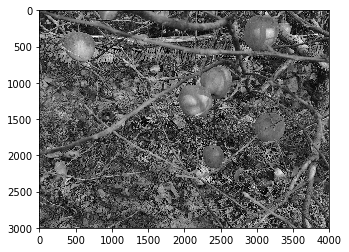

B通道灰度图


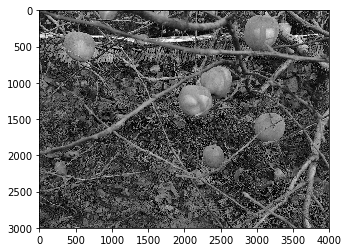

R通道灰度图


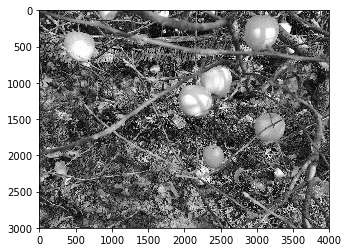

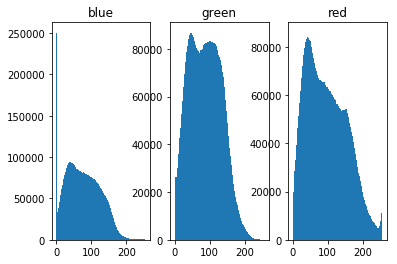

In [10]:
split_rgb(original_img)

In [11]:
# 灰度图像平滑
def grayImg_smooth(gray_img):
    print("灰度图像高斯滤波")
    img_Gaussian_smooth = cv2.GaussianBlur(gray_img,(3,3),1)
    cv2.imwrite("data/data142040/gray_img_Gaussian_smooth.png",img_Gaussian_smooth)
    plt.imshow(img_Gaussian_smooth)
    plt.show()

    print("灰度图像中值滤波")
    img_Median_smooth = cv2.medianBlur(gray_img,5)
    cv2.imwrite("data/data142040/gray_img_Median_smooth.png",img_Median_smooth)
    plt.imshow(img_Median_smooth)
    plt.show()

    print("灰度图像均值滤波")
    img_Avg_smooth = cv2.blur(gray_img,(5,5))
    cv2.imwrite("data/data142040/gray_img_Avg_smooth.png",img_Avg_smooth)
    plt.imshow(img_Avg_smooth)
    plt.show()


# 彩色图像平滑
def RGB_smooth(color_img,mode = "gaussian"):
    bgr = cv2.split(color_img)
    smooth_imgs = []
    if mode == "gaussian":
        print("彩色图像高斯滤波")
        smooth_imgs.append(cv2.GaussianBlur(bgr[0],(3,3),1))
        smooth_imgs.append(cv2.GaussianBlur(bgr[1],(3,3),1))
        smooth_imgs.append(cv2.GaussianBlur(bgr[2],(3,3),1))
        cv2.imwrite("data/data142040/color_Gaussian_smooth.png".format(mode), cv2.merge(smooth_imgs)) 
    elif mode == "median":
        print("彩色图像中值滤波")
        smooth_imgs.append(cv2.medianBlur(bgr[0],5))
        smooth_imgs.append(cv2.medianBlur(bgr[1],5))
        smooth_imgs.append(cv2.medianBlur(bgr[2],5))
        cv2.imwrite("data/data142040/color_Median_smooth.png".format(mode), cv2.merge(smooth_imgs))
    else:
        print("彩色图像均值滤波")
        smooth_imgs.append(cv2.blur(bgr[0],(5,5)))
        smooth_imgs.append(cv2.blur(bgr[1],(5,5)))
        smooth_imgs.append(cv2.blur(bgr[2],(5,5)))
        cv2.imwrite("data/data142040/color_Avg_smooth.png".format(mode), cv2.merge(smooth_imgs))
    return cv2.merge(smooth_imgs)

灰度图像高斯滤波


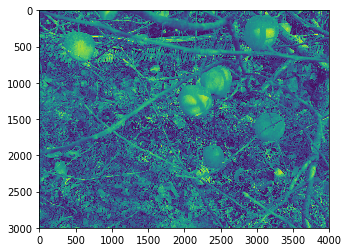

灰度图像中值滤波


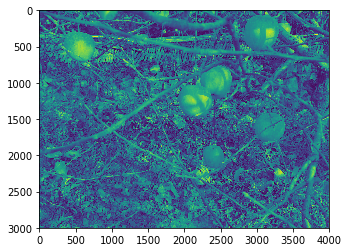

灰度图像均值滤波


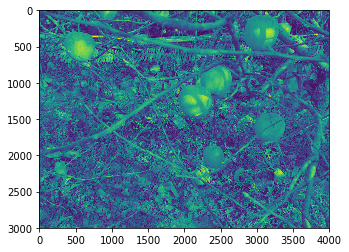

彩色图像高斯滤波


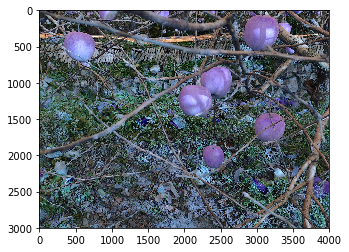

彩色图像中值滤波


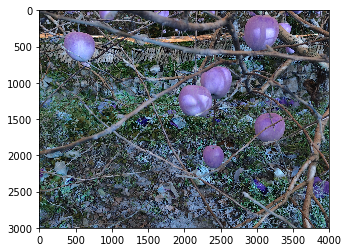

彩色图像均值滤波


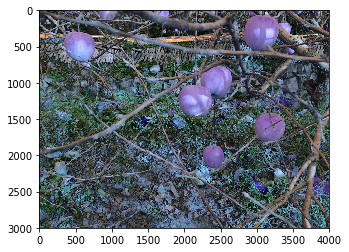

In [12]:
# 灰度图像高斯滤波 中值滤波 均值滤波
grayImg_smooth(gray_image)

# 彩色图像高斯滤波 中值滤波 均值滤波
plt.imshow(RGB_smooth(original_img,"gaussian"))
plt.show()

plt.imshow(RGB_smooth(original_img,"median"))
plt.show()

plt.imshow(RGB_smooth(original_img,"avg"))
plt.show()

In [13]:
# 图像锐化
def RGB_sharpen(img,channel):
    
    sharpen_imgs = []
    enhance_imgs = []

    # Sobel算子提取边缘
    img_sharpen = skimage.filters.sobel(img)
    img_sharpen = skimage.img_as_ubyte(img_sharpen)
    cv2.imwrite("data/data142040/{}_sobel_sharpen.png".format(channel),img_sharpen)
    enhance_edge = cv2.addWeighted(img, 1, img_sharpen, -1, cv2.CV_32F)
    cv2.imwrite("data/data142040/{}_sobel_Enhance.png".format(channel), enhance_edge)
    sharpen_imgs.append(img_sharpen)
    enhance_imgs.append(enhance_edge)

    # Prewitt算子提取边缘
    img_sharpen = skimage.filters.prewitt(img)
    img_sharpen = skimage.img_as_ubyte(img_sharpen)
    cv2.imwrite("data/data142040/{}_prewitt_sharpen.png".format(channel),img_sharpen)
    enhance_edge = cv2.addWeighted(img, 1, img_sharpen, -1, cv2.CV_32F)
    cv2.imwrite("data/data142040/{}_prewitt_Enhance.png".format(channel), enhance_edge)
    sharpen_imgs.append(img_sharpen)
    enhance_imgs.append(enhance_edge)

    # Laplacian算子提取边缘
    img_sharpen = cv2.Laplacian(img, cv2.CV_32F, ksize=3)
    img_sharpen = cv2.convertScaleAbs(img_sharpen)
    cv2.imwrite("data/data142040/{}_Laplacian_sharpen.png".format(channel),img_sharpen)
    enhance_edge = cv2.addWeighted(img, 1, img_sharpen, -1, cv2.CV_32F)
    cv2.imwrite("data/data142040/{}_Laplacian_Enhance.png".format(channel), enhance_edge)
    sharpen_imgs.append(img_sharpen)
    enhance_imgs.append(enhance_edge)

    # log算子提取边缘
    img_sharpen = cv2.GaussianBlur(img,(3,3),1)
    img_sharpen = cv2.Laplacian(img_sharpen, cv2.CV_32F, ksize=3)
    img_sharpen = cv2.convertScaleAbs(img_sharpen)
    cv2.imwrite("data/data142040/{}_log_sharpen.png".format(channel),img_sharpen)
    enhance_edge = cv2.addWeighted(img, 1, img_sharpen, -1, cv2.CV_32F)
    cv2.imwrite("data/data142040/{}_log_Enhance.png".format(channel), enhance_edge)
    sharpen_imgs.append(img_sharpen)
    enhance_imgs.append(enhance_edge)
    
    return sharpen_imgs,enhance_imgs

In [14]:
# 对滤波后的图像进行锐化和提取边缘操作
smooth_img = cv2.imread("data/data142040/color_Gaussian_smooth.png")
bgr = cv2.split(smooth_img) # 将高斯平滑后图像分为bgr三通道图像
print("B通道分量锐化 提取边缘")
B_imgs = RGB_sharpen(bgr[0],"blue")
print("G通道分量锐化 提取边缘")
G_imgs = RGB_sharpen(bgr[1],"green")
print("R通道分量锐化 提取边缘")
R_imgs = RGB_sharpen(bgr[2],"red")

# 合并边缘图像 sobel
sharpen_img = cv2.merge([B_imgs[0][0],G_imgs[0][0],R_imgs[0][0]])
enhance_img = cv2.merge([B_imgs[1][0],G_imgs[1][0],R_imgs[1][0]])
cv2.imwrite("data/data142040/after_sobel_sharpen.jpg",sharpen_img)
cv2.imwrite("data/data142040/after_sobel_enhance.jpg",enhance_img)

# 合并边缘图像 Prewitt
sharpen_img = cv2.merge([B_imgs[0][1],G_imgs[0][1],R_imgs[0][1]])
enhance_img = cv2.merge([B_imgs[1][1],G_imgs[1][1],R_imgs[1][1]])
cv2.imwrite("data/data142040/after_Prewitt_sharpen.jpg",sharpen_img)
cv2.imwrite("data/data142040/after_Prewitt_enhance.jpg",enhance_img)

# 合并边缘图像 Laplacian
sharpen_img = cv2.merge([B_imgs[0][2],G_imgs[0][2],R_imgs[0][2]])
enhance_img = cv2.merge([B_imgs[1][2],G_imgs[1][2],R_imgs[1][2]])
cv2.imwrite("data/data142040/after_Laplacian_sharpen.jpg",sharpen_img)
cv2.imwrite("data/data142040/after_Laplacian_enhance.jpg",enhance_img)

# 合并边缘图像 log
sharpen_img = cv2.merge([B_imgs[0][3],G_imgs[0][3],R_imgs[0][3]])
enhance_img = cv2.merge([B_imgs[1][3],G_imgs[1][3],R_imgs[1][3]])
cv2.imwrite("data/data142040/after_log_sharpen.jpg",sharpen_img)
cv2.imwrite("data/data142040/after_log_enhance.jpg",enhance_img)

# plt.imshow(sharpen_img)
# plt.show()
# plt.imshow(enhance_img)
# plt.show()


B通道分量锐化 提取边缘
G通道分量锐化 提取边缘
R通道分量锐化 提取边缘


True

In [15]:
# 将rgb图像转化到hsv空间
def RGBtoHSV(image):
    hsvImg = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    (h,s,v) = cv2.split(hsvImg)
    cv2.imwrite("data/data142040/HSV.jpg",hsvImg)
    cv2.imwrite("data/data142040/HSV-H.jpg",h)
    cv2.imwrite("data/data142040/HSV-S.jpg",s)
    cv2.imwrite("data/data142040/HSV-V.jpg",v)
    return hsvImg,h,s,v

# hsv图像各分量灰度直方图
def hsv_hist(img):
    names_hsv = ['h','s','v']
    for i,col in enumerate(names_hsv):
        plt.subplot(1,3,i+1)
        if i==0:
            plt.hist(cv2.split(img)[i].ravel(),180,[0,179])
        else:
            plt.hist(cv2.split(img)[i].ravel(),256,[0,256])
        plt.title(names_hsv[i])
    plt.show()

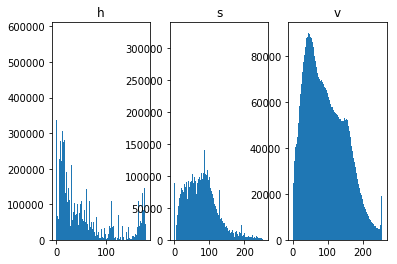

In [16]:
img = cv2.imread(r"data/data142040/after_sobel_enhance.jpg")
hsvPics = RGBtoHSV(img)
hsv_hist(hsvPics[0])

In [17]:
# 利用H通道进行图像阈值分割
def separateByH(h_img,bottom,top,img):
    binary = h_img.copy()
    rows = h_img.shape[0]
    cols = h_img.shape[1]
    for i in range(rows):
        for j in range(cols):
            if bottom<binary[i][j] and binary[i][j]<top:
                binary[i][j] = 0
            else:
                binary[i][j] = 255
    cv2.imwrite("data/data142040/separate_by_h_binary.jpg",binary)

    number,_,stats,centroids = cv2.connectedComponentsWithStats(binary)
    area = 0
    for i in range(1,number):
        area+=stats[i][4]
    cimg = img.copy()
    for j in range(3):
        cimg[:,:,j] = cv2.bitwise_and(binary,img[:,:,j])
    cv2.imwrite("data/data142040/separate_by_h.jpg",cimg)
    return cimg,area,binary

In [18]:
hsv_pic = cv2.imread(r"data/data142040/HSV-H.jpg")
separateByH(hsvPics[1],0,160,hsvPics[0])

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 1616006,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0,

In [19]:
# 分水岭算法进行图像分割
def watershed(img):
    #边缘保留滤波
    blurred=cv2.pyrMeanShiftFiltering(img,10,100)
    #转换为灰度图像
    gray=cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    #图像二值化
    ret,binary=cv2.threshold(gray,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    #定义形态学处理结构元素（卷积核）
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
    #形态学开操作
    mb=cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel,iterations=2)
    #形态学膨胀操作
    sure_bg=cv2.dilate(mb,kernel,iterations=3)
    #距离转换
    dist=cv2.distanceTransform(mb,cv2.DIST_L2,3)
    dist_output=cv2.normalize(dist,0,1.0,cv2.NORM_MINMAX)
    #图像二值化
    ret,surface=cv2.threshold(dist,dist.max()*0.6,255,cv2.THRESH_BINARY)
    #变为整数
    surface_fg=np.uint8(surface)
    #未知区域
    unknown=cv2.subtract(sure_bg,surface_fg)
    #找寻连通区域
    ret,markers=cv2.connectedComponents(surface_fg)
    markers=markers+1;
    markers[unknown==255]=0
    markers=cv2.watershed(img,markers=markers)
    img[markers==-1]=[0,255,255]
    cv2.imshow("result",img)


In [232]:
#腐蚀操作
def erode(gray_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(30,30))
    dst = cv2.erode(gray_image,kernel)
    return dst

# 膨胀操作
def dilate(gray_image):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    dst = cv2.dilate(gray_image,kernel)
    return dst

# 分离hsv中红色区域
def separateByColorRed(image):
    grid_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

    # hsv红色范围1
    lower1 = np.array([0,43,46])
    upper1 = np.array([10,255,255])
    mask1 = cv2.inRange(grid_HSV, lower1, upper1)
    res1 = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask1)

    # hsv红色范围2
    lower2 = np.array([156,43,46])
    upper2 = np.array([180,255,255])
    mask2 = cv2.inRange(grid_HSV, lower2, upper2)
    res2 = cv2.bitwise_and(grid_RGB,grid_RGB, mask=mask2)

    mask3 = mask1+mask2
    mask3 = erode(mask3)
    mask3 = dilate(mask3)
    res3 = cv2.bitwise_and(grid_RGB,grid_RGB, mask=mask3)
    
    return mask3,res3


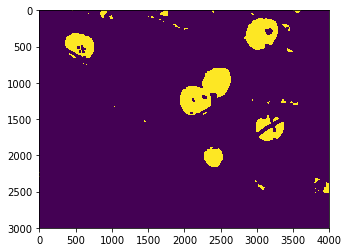

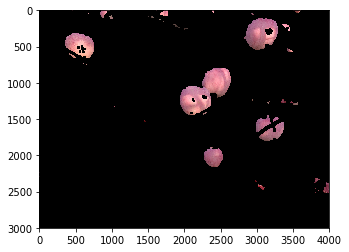

True

In [233]:
img = cv2.imread(r"data/data142040/after_sobel_enhance.jpg")
mask,s_img = separateByColorRed(img)

plt.imshow(mask)
plt.show()
plt.imshow(s_img)
plt.show()
cv2.imwrite("data/data142040/separate_plus_dinary.jpg",mask)
cv2.imwrite("data/data142040/separate_plus.jpg",s_img)

In [286]:
# 图像参数提取
def areaCalulate(image,ori_img):
    numbers, labels, stats, centroids = cv2.connectedComponentsWithStats(image)
    j = 0
    for i in range(0,numbers):
        # 剔除小面积区域
        if stats[i][4]<10000:
            numbers-=1
        else:
            print("连通区域{}的像素点个数为{}".format(j,stats[i][4]))
            print("连通区域{}的最小外接矩形面积为{}".format(j,stats[i][2]*stats[i][3]))
            print("")
            j+=1
            pts = np.array([
                [stats[i][0],stats[i][1]],
                [stats[i][0]+stats[i][2],stats[i][1]],
                [stats[i][0]+stats[i][2],stats[i][1]+stats[i][3]],
                [stats[i][0],stats[i][1]+stats[i][3]]
            ],np.int32)
            pts = pts.reshape((1,4,2))
            ori_img = cv2.polylines(ori_img,pts,True, (0, 255, 255), 50)
    print("检测到苹果个数为{}".format(numbers-1))
    return ori_img
    

连通区域0的像素点个数为11320374
连通区域0的最小外接矩形面积为12000000

连通区域1的像素点个数为144726
连通区域1的最小外接矩形面积为211820

连通区域2的像素点个数为92161
连通区域2的最小外接矩形面积为140822

连通区域3的像素点个数为248264
连通区域3的最小外接矩形面积为457488

连通区域4的像素点个数为26864
连通区域4的最小外接矩形面积为52117

连通区域5的像素点个数为46551
连通区域5的最小外接矩形面积为93717

连通区域6的像素点个数为55140
连通区域6的最小外接矩形面积为76296

检测到苹果个数为6


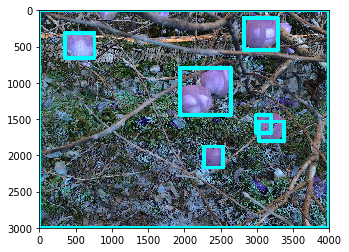

In [287]:
img_path =r"data/data142040/apples/5.jpg"
original_img = cv2.imread(img_path)
img = areaCalulate(mask,original_img)
cv2.imwrite("data/data142040/rect.jpg",img)
plt.imshow(img)
plt.show()